<a href="https://colab.research.google.com/github/Coder-Dilip/Deep-Learning-Tensorflow/blob/main/CNN/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
import cv2
import PIL
import os

In [ ]:
from tensorflow.keras import datasets,layers,models

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

170508288/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

(None, None, None)

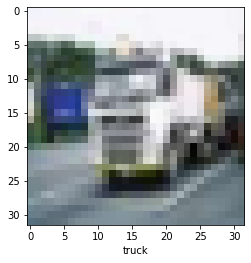

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def show(ind):
  plt.imshow(x_train[ind])
 
  plt.xlabel(classes[y_train[ind][0]])

show(5),show(57),show(1000)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
model1=keras.Sequential([
            layers.Flatten(input_shape=(32,32,3)),
            layers.Dense(3000,activation='relu'),
            layers.Dense(1000,activation='relu'),
            layers.Dense(10,activation='sigmoid')             
])

model1.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model1.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 7ms/step - loss: 1.8103 - accuracy: 0.3551
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6243 - accuracy: 0.4246
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5406 - accuracy: 0.4550
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4782 - accuracy: 0.4791
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4306 - accuracy: 0.4958
Epoch 6/10
 543/1563 [=========>....................] - ETA: 6s - loss: 1.3914 - accuracy: 0.5092

KeyboardInterrupt: ignored

In [ ]:
cnn=keras.Sequential([
            # cnn
            # filters means features (eg: for truck: windows, lights, tires, front view ,etc)
            # kernel size means the size of rectangle which is used to extract the features. 
            layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
            layers.MaxPooling2D((2,2)),
            
            # after extracting those features it again tries to find combined features, (eg: after finding eyes, nose of an animal it combine them and find head)
            # cnn
            layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
            layers.MaxPooling2D((2,2)),

            # Flattening those extracted features, just like we do for input shape in artificial neural network
            layers.Flatten(),
            
            # dense layers
            layers.Dense(64,activation='relu'),
            layers.Dense(10,activation='softmax')             
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
y_train=y_train.reshape(-1,)
cnn.fit(x_train,y_train,epochs=10)

KeyboardInterrupt: ignored

In [ ]:
y_pred=cnn.predict(x_test)
y_classes=[classes[np.argmax(el)] for el in y_pred]
print("predicted => ",y_classes[:10])
print("Actual ====> ",[classes[y_test[x][0]] for x in range(10)])

NameError: ignored

In [ ]:
dataset_url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [ ]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count=len(list(data_dir.glob('*/*.jpg')))

In [ ]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2183357362_4b4da4b6b5.jpg'),
 PosixPath('datasets/flower_photos/roses/8442304572_2fdc9c7547_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15674450867_0ced942941_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3630246240_4fee9a33db.jpg'),
 PosixPath('datasets/flower_photos/roses/5398569540_7d134c42cb_n.jpg')]

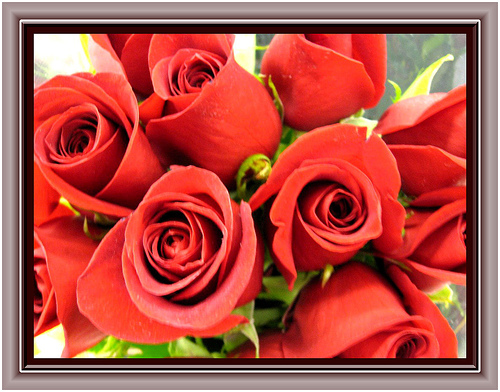

In [ ]:
PIL.Image.open(str(roses[0]))

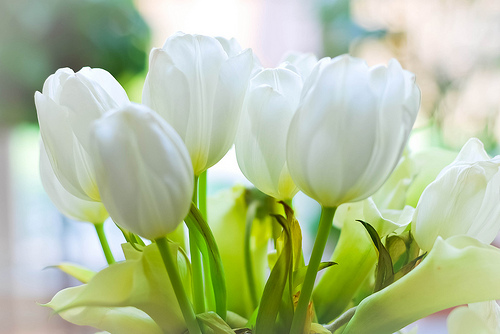

In [ ]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(tulips[0])

In [ ]:
flowers_images_dict={
    "roses":list(data_dir.glob('roses/*')),
    "daisy":list(data_dir.glob('daisy/*')),
    "tulips":list(data_dir.glob('tulips/*')),
    "dandelion":list(data_dir.glob('dandelion/*')),
    "sunflowers":list(data_dir.glob('sunflowers/*')),
}


In [ ]:
flowers_labels_dict={
    "roses":0,
    "daisy":1,
    "dandelion":2,
    "sunflowers":3,
    "tulips":4
}

In [ ]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[252, 251, 255],
        [255, 255, 252],
        [252, 251, 255],
        ...,
        [251, 250, 252],
        [255, 255, 251],
        [255, 254, 254]],

       [[255, 255, 252],
        [253, 255, 246],
        [255, 254, 255],
        ...,
        [255, 253, 255],
        [255, 254, 250],
        [255, 254, 254]],

       [[253, 252, 255],
        [254, 253, 255],
        [147, 144, 160],
        ...,
        [149, 147, 159],
        [255, 255, 255],
        [254, 254, 254]],

       ...,

       [[251, 249, 255],
        [255, 254, 255],
        [145, 142, 158],
        ...,
        [148, 145, 160],
        [254, 255, 253],
        [254, 255, 253]],

       [[255, 255, 254],
        [251, 255, 244],
        [255, 255, 255],
        ...,
        [255, 252, 255],
        [254, 253, 249],
        [255, 254, 253]],

       [[252, 250, 255],
        [255, 255, 252],
        [252, 251, 253],
        ...,
        [252, 251, 255],
        [255, 255, 251],
        [255, 254, 250]]

In [ ]:

X,y=[],[]

for flower_name,images in flowers_images_dict.items():
  for img in images:
    X.append(cv2.resize(cv2.imread(str(img)),(224,224)))
    y.append(flowers_labels_dict[flower_name])

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(len(x_train),len(x_test))

2752 918


In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
data_augmentation=keras.Sequential([
    
  layers.experimental.preprocessing.RandomZoom(0.3),
  layers.experimental.preprocessing.RandomRotation(0.3),
  layers.experimental.preprocessing.RandomContrast(0.3)

])

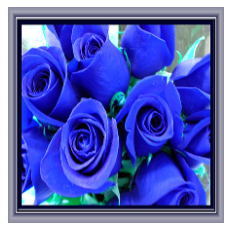

In [ ]:
plt.axis('off')
plt.imshow(X[0])

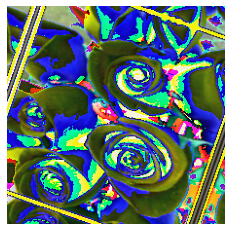

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [ ]:
model=keras.Sequential([
        data_augmentation,  
        layers.Conv2D(16,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),                
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),                
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),  
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(5,activation='softmax')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_scaled,y_train,epochs=30)

Epoch 1/30


KeyboardInterrupt: ignored

In [ ]:
model.evaluate(x_test_scaled,y_test)

In [ ]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(tulips[0])

In [ ]:
import tensorflow_hub as hub

feature_extractor_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer=hub.KerasLayer(
    feature_extractor_model,input_shape=(224,224,3),trainable=False
    )

In [ ]:
num_of_flowers=5
model=tf.keras.Sequential([
                           pretrained_model_without_top_layer,
                           tf.keras.layers.Dense(5)
])



In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 20s 81ms/step - loss: 0.7894 - accuracy: 0.7017
Epoch 2/5
86/86 [==============================] - 7s 81ms/step - loss: 0.4045 - accuracy: 0.8648
Epoch 3/5
86/86 [==============================] - 7s 81ms/step - loss: 0.3136 - accuracy: 0.8975
Epoch 4/5
86/86 [==============================] - 7s 81ms/step - loss: 0.2645 - accuracy: 0.9193
Epoch 5/5
86/86 [==============================] - 7s 81ms/step - loss: 0.2253 - accuracy: 0.9411


In [ ]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 4s 95ms/step - loss: 0.3621 - accuracy: 0.8758


[0.3621458411216736, 0.8758170008659363]

In [ ]:
predicted=model.predict(x_test_scaled[:5])
labe=["roses","daisy","dandelion","sunflowers","tulips"]
argMax=[]
for el in predicted:
  print(labe[np.argmax(el)])
  print(np.argmax(el))

y_test[:5]




daisy
1
roses
0
tulips
4
daisy
1
dandelion
2


array([1, 0, 4, 3, 2])

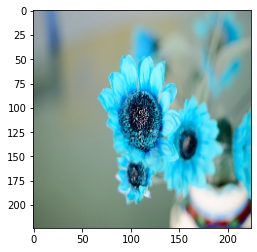

In [ ]:
plt.imshow(x_test[3])